In [1]:
!pip install youtube_transcript_api

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [4]:
from IPython.display import YouTubeVideo

In [5]:
video=input("Enter the link of your YouTube Video: ")

In [6]:
id_video=video.split("=")[1]
print(id_video)

T-JVpKku5SI


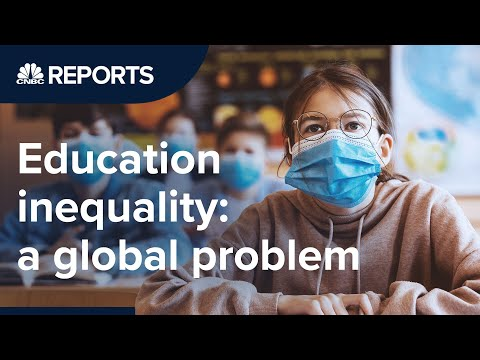

In [7]:
YouTubeVideo(id_video)

In [8]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [9]:
transcript

[{'text': 'Malcolm X once said that\n“Education is the passport to the future.”',
  'start': 0.099,
  'duration': 3.62},
 {'text': 'But what if some passports\nare better than others,',
  'start': 3.719,
  'duration': 2.481},
 {'text': 'giving the holder access\nto better schools and teachers',
  'start': 6.2,
  'duration': 2.39},
 {'text': 'and, in turn,\na more prosperous future?',
  'start': 8.59,
  'duration': 2.69},
 {'text': 'These inequalities have been around\nlong before Covid-19,',
  'start': 11.28,
  'duration': 2.32},
 {'text': 'and yet, the pandemic has both exacerbated them\nand made them more visible.',
  'start': 13.6,
  'duration': 4.48},
 {'text': 'While the standard of education\nvaries greatly globally,',
  'start': 22.5,
  'duration': 3.04},
 {'text': 'education inequality happens\nat the local level in all countries.',
  'start': 25.54,
  'duration': 3.94},
 {'text': 'For example, only four\nout of every 100 children in Africa',
  'start': 29.48,
  'duration': 3.4

In [10]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 Malcolm X once said that
“Education is the passport to the future.” But what if some passports
are better than others, giving the holder access
to better schools and teachers and, in turn,
a more prosperous future? These inequalities have been around
long before Covid-19, and yet, the pandemic has both exacerbated them
and made them more visible. While the standard of education
varies greatly globally, education inequality happens
at the local level in all countries. For example, only four
out of every 100 children in Africa is expected to enter a graduate
and postgraduate institution, compared to 14 out of 100
in South and West Asia and 36 out of 100
in Latin America. Even in developed countries,
the quality of schooling can differ greatly, whether rich or poor. High national wealth then,
is no guarantee of high equality. The U.K., Germany and the U.S. are among the
richest countries in the world, but all three rank poorly on an educational inequality league table
of 41

In [11]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['Malcolm X once said that “Education is the passport to the future.”', 'But what if some passports are better than others,', 'giving the holder access to better schools and teachers', 'and, in turn, a more prosperous future?', 'These inequalities have been around long before Covid-19,', 'and yet, the pandemic has both exacerbated them and made them more visible.', 'While the standard of education varies greatly globally,', 'education inequality happens at the local level in all countries.', 'For example, only four out of every 100 children in Africa', 'is expected to enter a graduate and postgraduate institution,', 'compared to 14 out of 100 in South and West Asia', 'and 36 out of 100 in Latin America.', 'Even in developed countries, the quality of schooling can differ greatly,', 'whether rich or poor.', 'High national wealth then, is no guarantee of high equality.', 'The U.K., Germany and the U.S. are among the richest countries in the world, but all three rank poorly', 'on an educat

In [12]:
paragraph=" ".join(doc)
print(paragraph)

Malcolm X once said that “Education is the passport to the future.” But what if some passports are better than others, giving the holder access to better schools and teachers and, in turn, a more prosperous future? These inequalities have been around long before Covid-19, and yet, the pandemic has both exacerbated them and made them more visible. While the standard of education varies greatly globally, education inequality happens at the local level in all countries. For example, only four out of every 100 children in Africa is expected to enter a graduate and postgraduate institution, compared to 14 out of 100 in South and West Asia and 36 out of 100 in Latin America. Even in developed countries, the quality of schooling can differ greatly, whether rich or poor. High national wealth then, is no guarantee of high equality. The U.K., Germany and the U.S. are among the richest countries in the world, but all three rank poorly on an educational inequality league table of 41 of the world’s

#NLTK Summarization

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
mytext= paragraph

In [31]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [32]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [33]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [34]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

#Spacy Summarization


In [35]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
roboflow 1.1.53 requires opencv-python-headless==4.10.0.84, but you have opencv-python-headless 4.11.0.86 which is incompatible.
sahi 0.11.20 requires numpy<2.0.0, but you have numpy 2.0.2 which is incompatible.
sahi 0.11.20 requires opencv-python<=4.10.0.84, but you have opencv-python 4.11.0.86 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
   - -------

In [36]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

In [37]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [38]:
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
      if word.text.lower() not in punctuation:
          if word.text not in word_frequencies.keys():
              word_frequencies[word.text] = 1
          else:
              word_frequencies[word.text] += 1

In [39]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_frequency

In [40]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
      if word.text.lower() in word_frequencies.keys():
          if sent not in sentence_scores.keys():                            
            sentence_scores[sent]=word_frequencies[word.text.lower()]
          else:
            sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

In [41]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

In [42]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[and bloodless jellyfish are some of the most diverse and fascinating creatures in the sea jellyfish aren't actually fish with thousands of different species in two different biological phyla jellyfish is more of a broad term than anything else unlike fish which have backbones jellyfish are invertebrates jellyfish got their common name from the jelly-like material they're made out of called mesoglia in recent years scientists have started using the umbrella term sea jellies to clear up the confusion there is an immortal jellyfish jellyfish can reproduce sexually by releasing sperm and eggs into the water and reproduce asexually by splitting into two or cloning but at least one jellyfish can actually reverse the aging process the turatopsis dorniere has earned the moniker the immortal jellyfish for being able to undergo a process called transdifferentiation an adult or juvenile under stress instead of dying can revert back to a polyp and begin the life cycle all over again it is the onl

In [43]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

"and bloodless jellyfish are some of the most diverse and fascinating creatures in the sea jellyfish aren't actually fish with thousands of different species in two different biological phyla jellyfish is more of a broad term than anything else unlike fish which have backbones jellyfish are invertebrates jellyfish got their common name from the jelly-like material they're made out of called mesoglia in recent years scientists have started using the umbrella term sea jellies to clear up the confusion there is an immortal jellyfish jellyfish can reproduce sexually by releasing sperm and eggs into the water and reproduce asexually by splitting into two or cloning but at least one jellyfish can actually reverse the aging process the turatopsis dorniere has earned the moniker the immortal jellyfish for being able to undergo a process called transdifferentiation an adult or juvenile under stress instead of dying can revert back to a polyp and begin the life cycle all over again it is the onl